<a href="https://colab.research.google.com/github/AmigoPivo/dbm-project/blob/master/Data_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#PATH = "G:/My Drive/UT MSBA/Fall 2019/Data Management/Project/"
from google.colab import drive
drive.mount('/content/drive')
PATH = "/content/drive/My Drive/UT MSBA/Fall 2019/Data Management/Project/"
data150 = pd.read_csv(PATH+'winemag-data_first150k.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data150.shape

(150930, 11)

In [4]:
data150.head()

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
for i in data150.columns:
    print(i,": ",round(sum(data150[i].isna())/len(data150[i]),2)*100)

id :  0.0
country :  0.0
description :  0.0
designation :  30.0
points :  0.0
price :  9.0
province :  0.0
region_1 :  17.0
region_2 :  60.0
variety :  0.0
winery :  0.0


In [6]:
data150.country.value_counts().head(10)

US             62397
Italy          23478
France         21098
Spain           8268
Chile           5816
Argentina       5631
Portugal        5322
Australia       4957
New Zealand     3320
Austria         3057
Name: country, dtype: int64

In [7]:
data150.country.value_counts().tail(10)

Bosnia and Herzegovina    4
Switzerland               4
China                     3
Slovakia                  3
Egypt                     3
Montenegro                2
Albania                   2
Tunisia                   2
Japan                     2
US-France                 1
Name: country, dtype: int64

In [8]:
data150['points'].value_counts()

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

(array([2.2958e+04, 4.2819e+04, 2.6087e+04, 1.6045e+04, 1.0699e+04,
        5.8250e+03, 3.5220e+03, 2.8730e+03, 1.6680e+03, 1.3100e+03,
        4.9600e+02, 4.3100e+02, 5.3800e+02, 2.8000e+02, 3.4300e+02,
        1.0300e+02, 1.1300e+02, 1.5000e+02, 5.1000e+01, 1.4900e+02,
        5.1000e+01, 4.6000e+01, 8.2000e+01, 3.0000e+01, 3.5000e+01,
        6.8000e+01, 3.2000e+01, 3.9000e+01, 2.6000e+01, 1.8000e+01]),
 array([  4.        ,  13.83333333,  23.66666667,  33.5       ,
         43.33333333,  53.16666667,  63.        ,  72.83333333,
         82.66666667,  92.5       , 102.33333333, 112.16666667,
        122.        , 131.83333333, 141.66666667, 151.5       ,
        161.33333333, 171.16666667, 181.        , 190.83333333,
        200.66666667, 210.5       , 220.33333333, 230.16666667,
        240.        , 249.83333333, 259.66666667, 269.5       ,
        279.33333333, 289.16666667, 299.        ]),
 <a list of 30 Patch objects>)

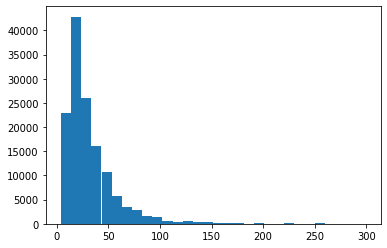

In [9]:
plt.hist(data150[data150['price']<300].price, bins = 30)

(array([ 2400., 10089., 23119., 36320., 30792., 26509., 15258.,  5178.,
         1060.,   205.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 10 Patch objects>)

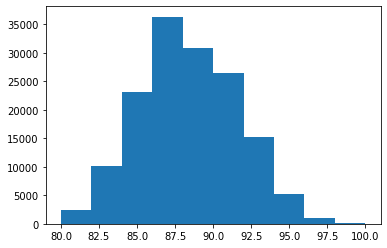

In [10]:
plt.hist(data150.points)

In [0]:
data150['rating'] = 'bad'
data150.loc[data150['points'].astype(int) > 87.5,'rating'] = 'neutral'
data150.loc[data150['points'].astype(int) > 90,'rating'] = 'good'

In [12]:
data150['rating'].value_counts()

bad        71928
neutral    46765
good       32237
Name: rating, dtype: int64

Text(0, 0.5, 'points')

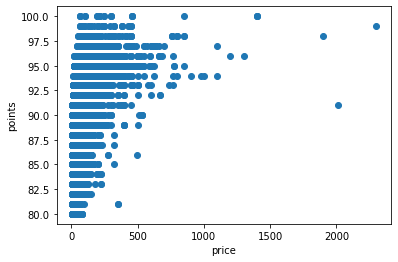

In [13]:
plt.scatter(data150['price'],data150['points'])
plt.xlabel('price')
plt.ylabel('points')

In [14]:
country_points = data150.groupby('country').mean()['points'].sort_values(ascending = False).dropna()
print(country_points.head(10))
print(country_points.tail(10))

country
England     92.888889
Austria     89.276742
France      88.925870
Germany     88.626427
Italy       88.413664
Canada      88.239796
Slovenia    88.234043
Morocco     88.166667
Turkey      88.096154
Portugal    88.057685
Name: points, dtype: float64
country
Moldova        84.718310
Ukraine        84.600000
Uruguay        84.478261
Lithuania      84.250000
Egypt          83.666667
Slovakia       83.666667
Brazil         83.240000
China          82.000000
Montenegro     82.000000
South Korea    81.500000
Name: points, dtype: float64


In [15]:
country_price = data150.groupby('country').mean()['price'].sort_values(ascending = False).dropna()
print(country_price.head(10))
print(country_price.tail(10))

country
US-France     50.000000
England       47.500000
France        45.619885
Hungary       44.204348
Luxembourg    40.666667
Germany       39.011078
Italy         37.547913
Canada        34.628866
US            33.653808
Israel        31.304918
Name: price, dtype: float64
country
Moldova                   15.366197
Slovakia                  15.333333
Macedonia                 15.312500
India                     13.875000
South Korea               13.500000
Ukraine                   13.000000
Bosnia and Herzegovina    12.750000
Bulgaria                  11.545455
Lithuania                 10.000000
Montenegro                10.000000
Name: price, dtype: float64


In [16]:
print('High value wines')
display((country_points/country_price).sort_values(ascending = False).head(10))
print('\nLower value wines')
display((country_points/country_price).sort_values(ascending = False).dropna().tail(10))

High value wines


country
Lithuania                 8.425000
Montenegro                8.200000
Bulgaria                  7.402700
Bosnia and Herzegovina    6.647059
Ukraine                   6.507692
India                     6.315315
South Korea               6.037037
Cyprus                    5.545833
Macedonia                 5.538776
Moldova                   5.513291
dtype: float64


Lower value wines


country
Israel        2.784744
US            2.609476
Canada        2.548157
Italy         2.354689
Germany       2.271827
Luxembourg    2.139344
Hungary       1.975575
England       1.955556
France        1.949279
US-France     1.760000
dtype: float64

# Descriptipon 1

In [17]:
words = data150[['description','points']]
words['description'] = words['description'].str.split(' ')
words['length'] = words['description'].map(lambda x: len(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
words['length'].value_counts()

38     5644
39     5587
37     5504
36     5421
41     5358
       ... 
112       1
109       1
102       1
101       1
127       1
Name: length, Length: 113, dtype: int64

Text(0, 0.5, 'points')

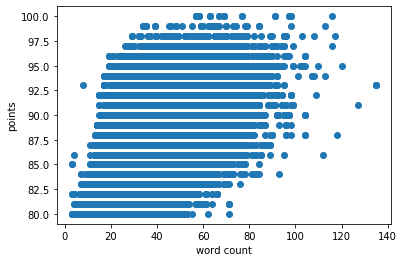

In [19]:
plt.scatter(words['length'],words['points'])
plt.xlabel('word count')
plt.ylabel('points')

In [20]:
pd.Series(' '.join(data150['description']).lower().split()).value_counts()[:100]

and          404610
the          258167
a            215292
of           184062
with         152210
              ...  
you            7290
up             7240
little         7178
chocolate      7121
than           7084
Length: 100, dtype: int64

# NLTK

In [21]:
!pip install nltk

import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

word_input = data150['description']

def preprocess(s):
    s = re.sub(r'\d+', '', s)
    return re.sub(r'[^\w\s]', '', s).strip().lower()

def tokenize(s):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(s)
    result = [i for i in tokens if not i in stop_words]
    return result

word_result = word_input.map(preprocess)
word_result = word_result.map(tokenize)


# result = [i for i in tokens if not i in stop_words]
# print (result)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
word_result

0         [tremendous, varietal, wine, hails, oakville, ...
1         [ripe, aromas, fig, blackberry, cassis, soften...
2         [mac, watson, honors, memory, wine, made, moth...
3         [spent, months, new, french, oak, incorporates...
4         [top, wine, la, bégude, named, highest, point,...
                                ...                        
150925    [many, people, feel, fiano, represents, southe...
150926    [offers, intriguing, nose, ginger, lime, flora...
150927    [classic, example, comes, cru, vineyard, calle...
150928    [perfect, salmon, shade, scents, peaches, cher...
150929    [pinot, grigios, taste, like, rich, pearlike, ...
Name: description, Length: 150930, dtype: object

Text(0, 0.5, 'points')

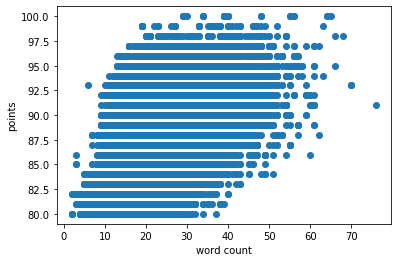

In [23]:
len_wr = word_result.map(lambda x: len(x))
plt.scatter(len_wr,words['points'])
plt.xlabel('word count')
plt.ylabel('points')

In [0]:
from collections import Counter

s = pd.Series(Counter([y for x in word_result for y in x]))

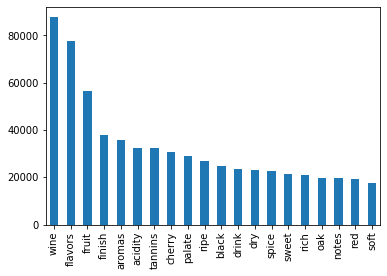

In [25]:
s.sort_values(ascending = False).head(20).plot(kind = 'bar')

In [26]:
#mask = word_result.map(lambda x: 'fruit' in x)
#data150[mask].points.mean()

data150[word_result.map(lambda x: 'tannins' in x)].points.mean()

88.84002054310842

In [0]:
processed_features = []
features = word_input
for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
    


In [0]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
labels = data150['rating']

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

#vectorizer = TfidfVectorizer (max_features=500, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))
vectorizer= TfidfVectorizer (max_features = 600, min_df = 5, max_df = 0.8, ngram_range=(1, 2), stop_words=stopwords.words('english'))

features_train = vectorizer.fit_transform(X_train).toarray()
features_test = vectorizer.fit_transform(X_test).toarray()


In [0]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=300, random_state=0)
#text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(features_train, y_train)

predictions = text_classifier.predict(features_test)

In [46]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[10354  1255  2754]
 [ 3185  1238  2052]
 [ 5562  1084  2702]]
              precision    recall  f1-score   support

         bad       0.54      0.72      0.62     14363
        good       0.35      0.19      0.25      6475
     neutral       0.36      0.29      0.32      9348

    accuracy                           0.47     30186
   macro avg       0.42      0.40      0.40     30186
weighted avg       0.44      0.47      0.45     30186

0.4735307758563573


In [47]:
from sklearn.naive_bayes import MultinomialNB

naive_classifier = MultinomialNB()
naive_classifier.fit(features_train, y_train)
n_predictions = naive_classifier.predict(features_test)

print(confusion_matrix(y_test,n_predictions))
print(classification_report(y_test,n_predictions))
print(accuracy_score(y_test, n_predictions))

[[10535   244  3584]
 [ 3099   336  3040]
 [ 5786   212  3350]]
              precision    recall  f1-score   support

         bad       0.54      0.73      0.62     14363
        good       0.42      0.05      0.09      6475
     neutral       0.34      0.36      0.35      9348

    accuracy                           0.47     30186
   macro avg       0.43      0.38      0.35     30186
weighted avg       0.45      0.47      0.42     30186

0.4711124362287153


In [0]:
# labels2 = data150['price']
# X_train, X_test, y_train, y_test = train_test_split(processed_features, labels2, test_size=0.2, random_state=0)
# vectorizer = TfidfVectorizer (max_features=500, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))
# features_train = vectorizer.fit_transform(X_train).toarray()
# features_test = vectorizer.fit_transform(X_test).toarray()

# text_classifier2 = RandomForestClassifier(n_estimators=200, random_state=0)
# text_classifier2.fit(features_train, y_train)
# predictions2 = text_classifier.predict(features_test)

In [0]:
# print(confusion_matrix(y_test,predictions2))
# print(classification_report(y_test,predictions2))
# print(accuracy_score(y_test, predictions2))